<a href="https://colab.research.google.com/github/espartaca75-prog/Optmizacion_dinamica_discreta/blob/main/COD_programaci%C3%B3n_din%C3%A1mica_Ejemplo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejemplo 3

---



In [1]:
import numpy as np
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# --- 1. CONFIGURACIÓN DEL PROBLEMA ---
T = 10         # Horizonte temporal
rho = 1.05     # Factor de retorno (5% interés)
x0 = 100.0     # Riqueza inicial

valor_funciones = {}
politicas_num = {}

In [3]:
# --- 2. INDUCCIÓN HACIA ATRÁS ---
valor_funciones[T + 1] = lambda x: 0

for t in range(T, -1, -1):
    def objetivo_negativo(u, x_actual, t_idx):
        consumo = u * x_actual
        utilidad_inmediata = np.sqrt(consumo)
        x_siguiente = rho * (1 - u) * x_actual
        valor_futuro = valor_funciones[t_idx + 1](x_siguiente)
        return -(utilidad_inmediata + valor_futuro)

    # Descubrimos la política óptima ut* evaluando un x genérico
    res = minimize_scalar(objetivo_negativo, args=(1.0, t), bounds=(0, 1), method='bounded')
    u_optimo = res.x
    politicas_num[t] = u_optimo
    valor_funciones[t] = lambda x, u_f=u_optimo, t_i=t: -objetivo_negativo(u_f, x, t_i)

In [4]:
# --- 3. RECONSTRUCCIÓN DE LA TRAYECTORIA (FORWARD PASS) ---
x_hist = [x0]
c_hist = []
u_hist = []

for t in range(T + 1):
    u_t = politicas_num[t]
    x_t = x_hist[-1]

    u_hist.append(u_t)
    c_hist.append(u_t * x_t) # Consumo real

    if t < T:
        x_next = rho * (1 - u_t) * x_t
        x_hist.append(x_next)

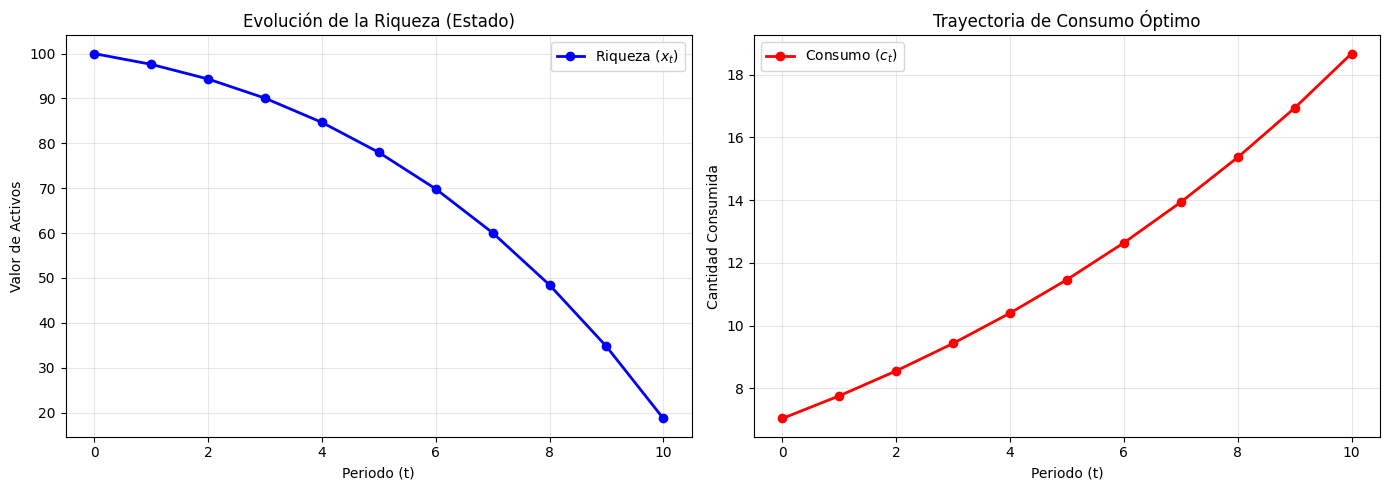

In [5]:
# --- 4. VISUALIZACIÓN DE RESULTADOS ---
plt.figure(figsize=(14, 5))

# Gráfico 1: Evolución de la Riqueza (Variable de Estado)
plt.subplot(1, 2, 1)
plt.plot(range(T + 1), x_hist, 'bo-', label='Riqueza ($x_t$)', linewidth=2)
plt.title('Evolución de la Riqueza (Estado)', fontsize=12)
plt.xlabel('Periodo (t)')
plt.ylabel('Valor de Activos')
plt.grid(True, alpha=0.3)
plt.legend()

# Gráfico 2: Trayectoria del Consumo (Variable de Control)
plt.subplot(1, 2, 2)
plt.plot(range(T + 1), c_hist, 'ro-', label='Consumo ($c_t$)', linewidth=2)
plt.title('Trayectoria de Consumo Óptimo', fontsize=12)
plt.xlabel('Periodo (t)')
plt.ylabel('Cantidad Consumida')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()


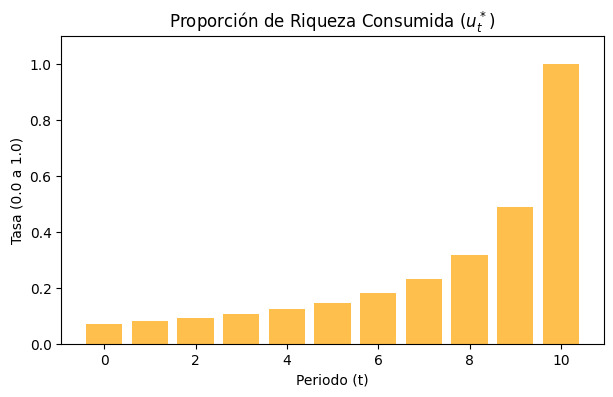

In [6]:
# Gráfico de Tasa de Consumo (u*)
plt.figure(figsize=(7, 4))
plt.bar(range(T + 1), u_hist, color='orange', alpha=0.7)
plt.title('Proporción de Riqueza Consumida ($u_t^*$)')
plt.xlabel('Periodo (t)')
plt.ylabel('Tasa (0.0 a 1.0)')
plt.ylim(0, 1.1)
plt.show()

In [7]:
# --- 5. RESULTADOS ---

# Preparamos los datos obtenidos en el Forward Pass
periodos = list(range(T + 1))

# Calculamos el consumo real (c_t = u_t * x_t)
# Notar que u_t es la proporción de la riqueza x_t que se consume
consumo_real = [u * x for u, x in zip(u_hist, x_hist)]

# Construimos el DataFrame
df_resultados = pd.DataFrame({
    'Periodo (t)': periodos,
    'Riqueza (xt)': x_hist,
    'Tasa Optima (ut*)': u_hist,
    'Consumo Real (ct)': consumo_real
})

# Formateamos la salida
pd.options.display.float_format = '{:,.4f}'.format
print("TABLA DE TRAYECTORIA ÓPTIMA ")
print(df_resultados.to_string(index=False))

TABLA DE TRAYECTORIA ÓPTIMA 
 Periodo (t)  Riqueza (xt)  Tasa Optima (ut*)  Consumo Real (ct)
           0      100.0000             0.0704             7.0389
           1       97.6092             0.0795             7.7604
           2       94.3412             0.0907             8.5557
           3       90.0747             0.1047             9.4328
           4       84.6741             0.1228            10.3997
           5       77.9881             0.1470            11.4656
           6       69.8485             0.1810            12.6409
           7       60.0680             0.2320            13.9365
           8       48.4380             0.3172            15.3650
           9       34.7267             0.4878            16.9399
          10       18.6761             1.0000            18.6760
